In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import poisson
from tqdm import tqdm
from functools import lru_cache
import numpy as np

In [2]:
V = {s: 0 for s in range(1, 100)}
V[0] = 0
V[100] = 0

In [3]:
def possible_actions(s):
    yield from range(1, min(s, 100 - s) + 1)

In [4]:
list(possible_actions(86))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [5]:
ph = 0.4

def possible_outcomes(s, a):
    assert s < 100
    head = s + a
    assert head <= 100
    tail = s - a
    assert tail >= 0
    r_head = 1 if head >= 100 else 0
    yield ph, r_head, head
    yield 1 - ph, 0, tail

In [6]:
list(possible_outcomes(96, 2))

[(0.4, 0, 98), (0.6, 0, 94)]

In [7]:
list(possible_outcomes(98, 2))

[(0.4, 1, 100), (0.6, 0, 96)]

In [8]:
list(possible_outcomes(98, 1))

[(0.4, 0, 99), (0.6, 0, 97)]

In [9]:
def plot_value():
    myList = V.items()
    myList = sorted(myList)[1: -1] 
    x, y = zip(*myList)
    plt.hlines(0.5, 0, 100, color='g', linestyles='dashed')
    plt.hlines(ph, 0, 100, color='r')
    plt.xticks([1, 25, 50, 75, 99])
    plt.plot(x, y)

In [10]:
def policy(s):
    return sorted(possible_actions(s), key=lambda a: (sum(p * (r + gamma * V[sp]) for p, r, sp in possible_outcomes(s, a)), -a))[-1]

In [11]:
def show_policy():
    figure(figsize=(16, 6), dpi=80)
    plt.xticks([1, 25, 50, 75, 99])
    plt.yticks(range(0, 51, 5))
    x = list(range(1, 100))
    plt.hlines(1, 0, 100, color='g', linestyles='dashed')
    plt.bar(x, [policy(s) for s in x])

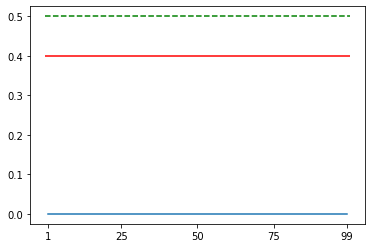

In [12]:
plot_value()

In [13]:
theta = 0.01

In [14]:
gamma = 1

def value_iteration():
    while True:
        delta = 0
        for s in range(1, 100):
            v = V[s]
            action_value = {
                a: sum(p * (r + gamma * V[sp]) for p, r, sp in possible_outcomes(s, a))
                for a in possible_actions(s)
            }
            V[s] = max(action_value.values())
            delta = max(delta, abs(v - V[s]))
#         print(delta)
        if delta <= theta:
            break

In [15]:
value_iteration()

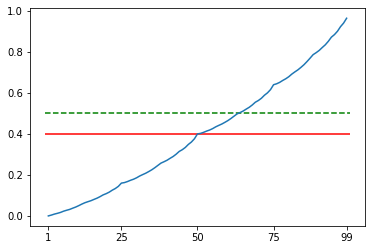

In [16]:
plot_value()

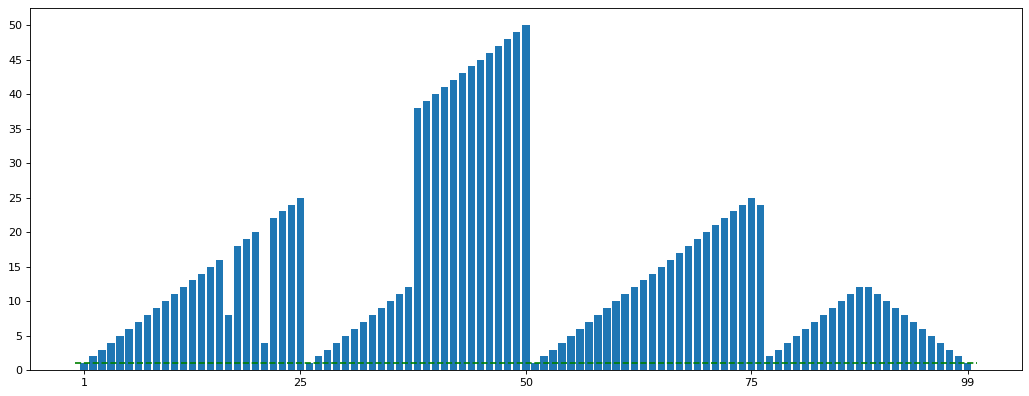

In [17]:
show_policy()

In [18]:
theta = 0.0001
value_iteration()

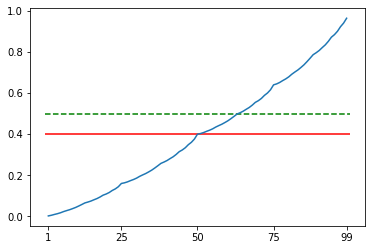

In [19]:
plot_value()

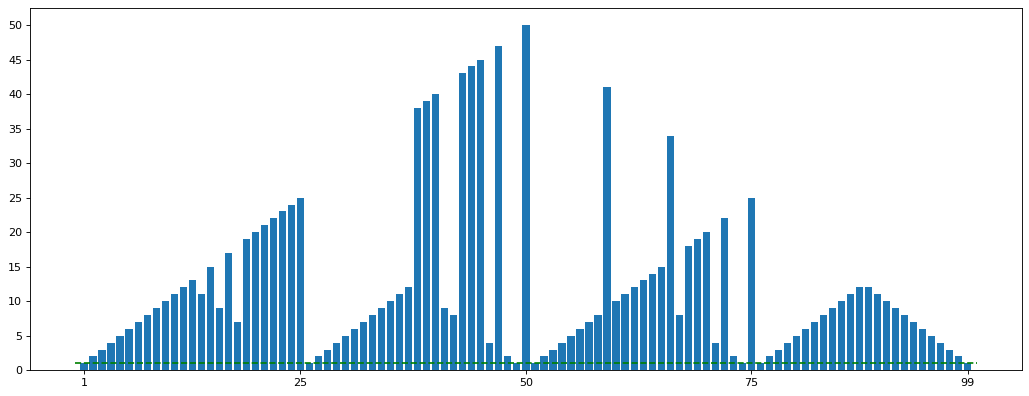

In [20]:
show_policy()

In [21]:
theta = 0
value_iteration()

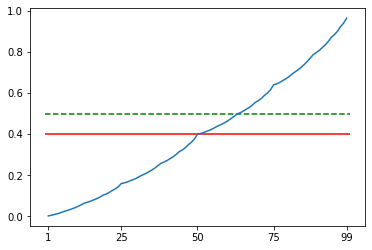

In [24]:
plot_value()

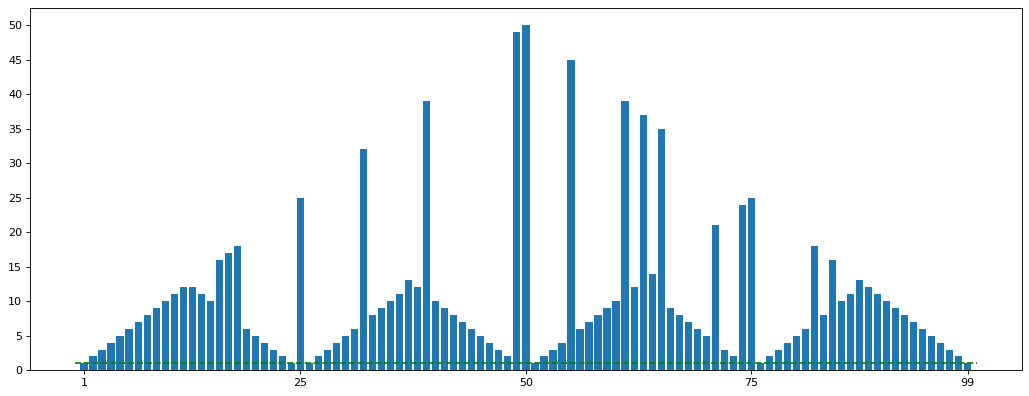

In [25]:
show_policy()